In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 한 인디언 부족의 당뇨병 문제 예측
- 데이터를 가지고 당뇨병이 있는지 없을지 예측한다.
- train.csv를 학습시켜 test.csv를 예측시킨다. 

### 데이터를 읽어온다.

In [2]:
train_df = pd.read_csv("data/diabetes_train.csv")
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
test_df = pd.read_csv("data/diabetes_test.csv")
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,108,88,19,0,27.1,0.400,24
1,6,96,0,0,0,23.7,0.190,28
2,1,124,74,36,0,27.8,0.100,30
3,7,150,78,29,126,35.2,0.692,54
4,4,183,0,0,0,28.4,0.212,36


### 데이터프레임 정보 확인

In [4]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               600 non-null    int64  
 1   Glucose                   600 non-null    int64  
 2   BloodPressure             600 non-null    int64  
 3   SkinThickness             600 non-null    int64  
 4   Insulin                   600 non-null    int64  
 5   BMI                       600 non-null    float64
 6   DiabetesPedigreeFunction  600 non-null    float64
 7   Age                       600 non-null    int64  
 8   Outcome                   600 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

(None, None)

결측치가 없는것을 확인할 수 있다.

### 데이터 전처리

In [5]:
train_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Pregnancies
- 임신횟수?

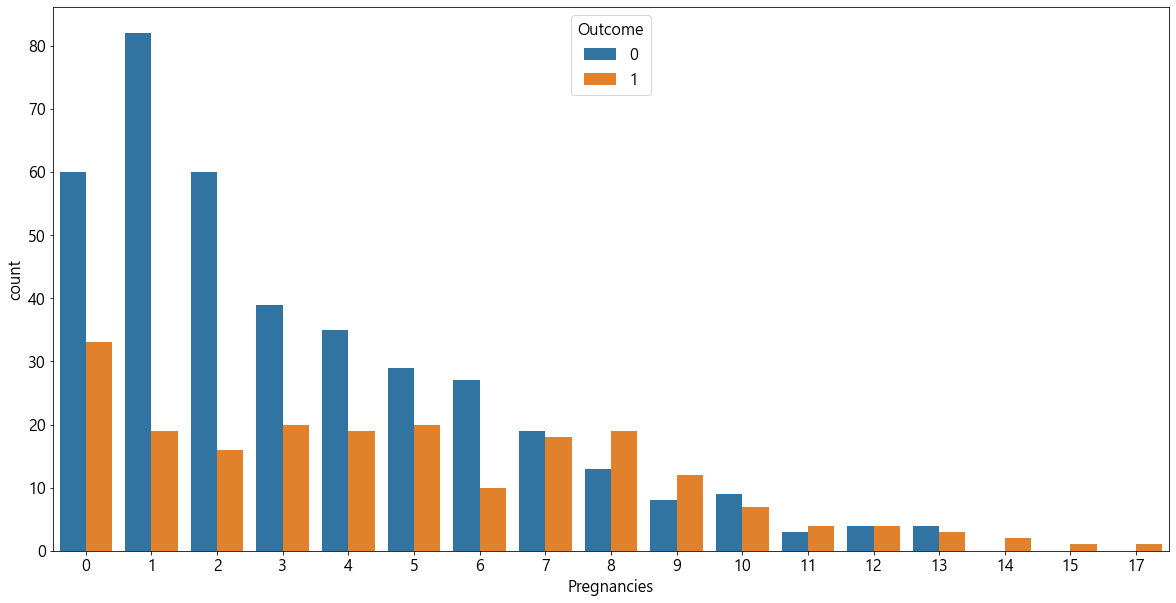

In [6]:
# 결측치를 제외하고 데이터가 같은 것끼리 그룹으로 묶어 그 수를 구해 그래프로 그린다.
# x = 수를 계산할 칼럼
# hue = 결과 데이터 칼럼
# 전체적인 비율을 볼 때 사용
sns.countplot(data=train_df, x="Pregnancies", hue="Outcome")
plt.show()

임신횟수가 높을 수록 (7~8이상부터) 당뇨병 걸릴 횟수가 많아짐

### Glucose
- 글루코스

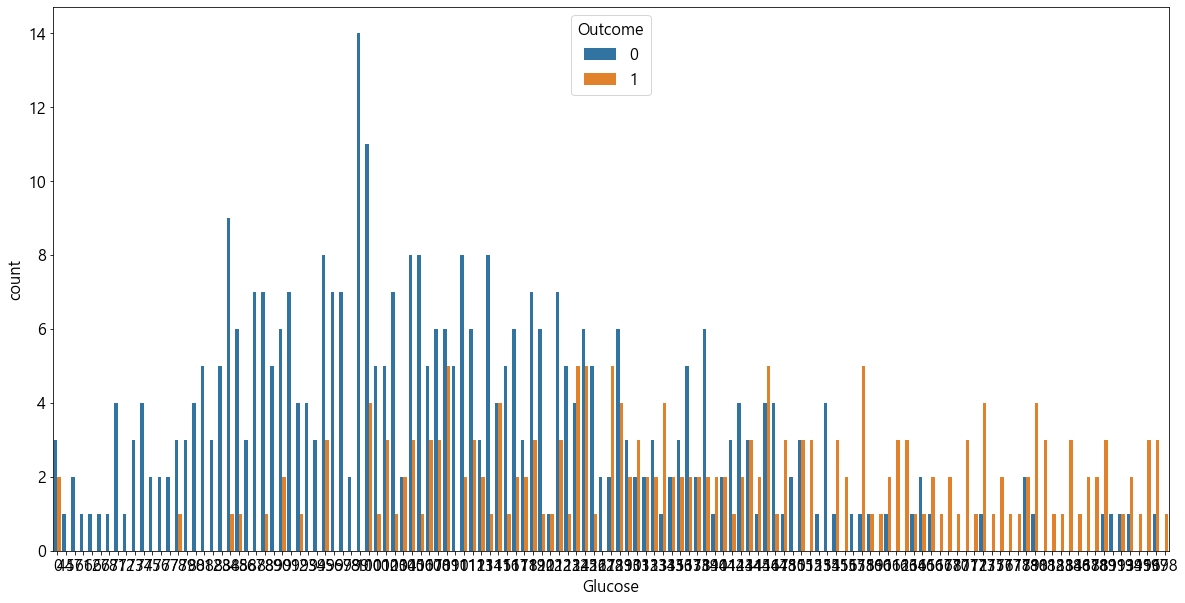

In [7]:
sns.countplot(data=train_df, x="Glucose", hue="Outcome")
plt.show()

글루코스가 높을 수록 당뇨병에 잘 걸린다.

### BloodPressure
- 혈압

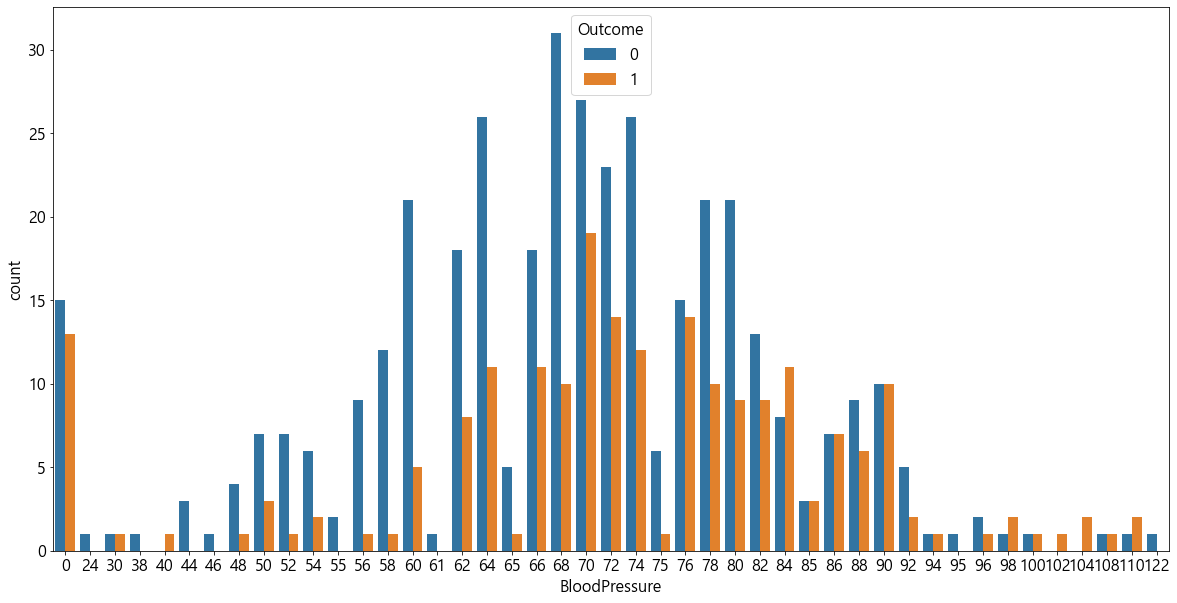

In [8]:
sns.countplot(data=train_df, x="BloodPressure", hue="Outcome")
plt.show()

혈압이 높을 수록 비율은 조금 더 높아지는 것 같다.

### SkinThickness
- 피부두께

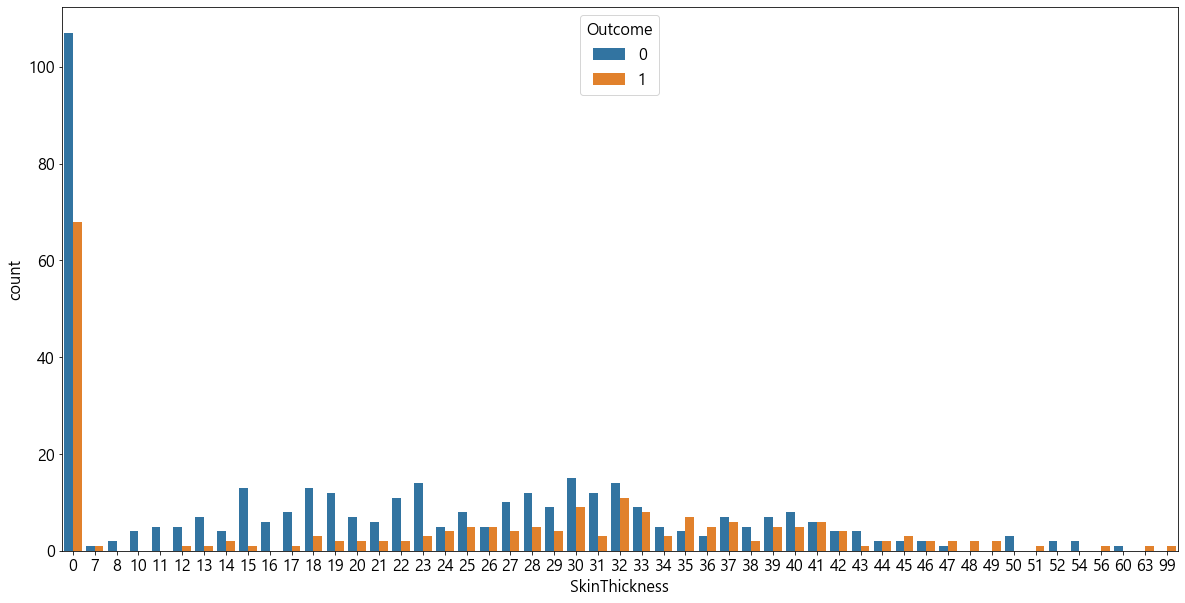

In [9]:
sns.countplot(data=train_df, x="SkinThickness", hue="Outcome")
plt.show()

두께가 높을 수록 병걸릴 확률이 높다.
그리고 아마 0이 비정상적으로 많은데 이것은 아마 결측치를 대신에 0으로 기입한것 같다.

### Insulin
- 인슐린

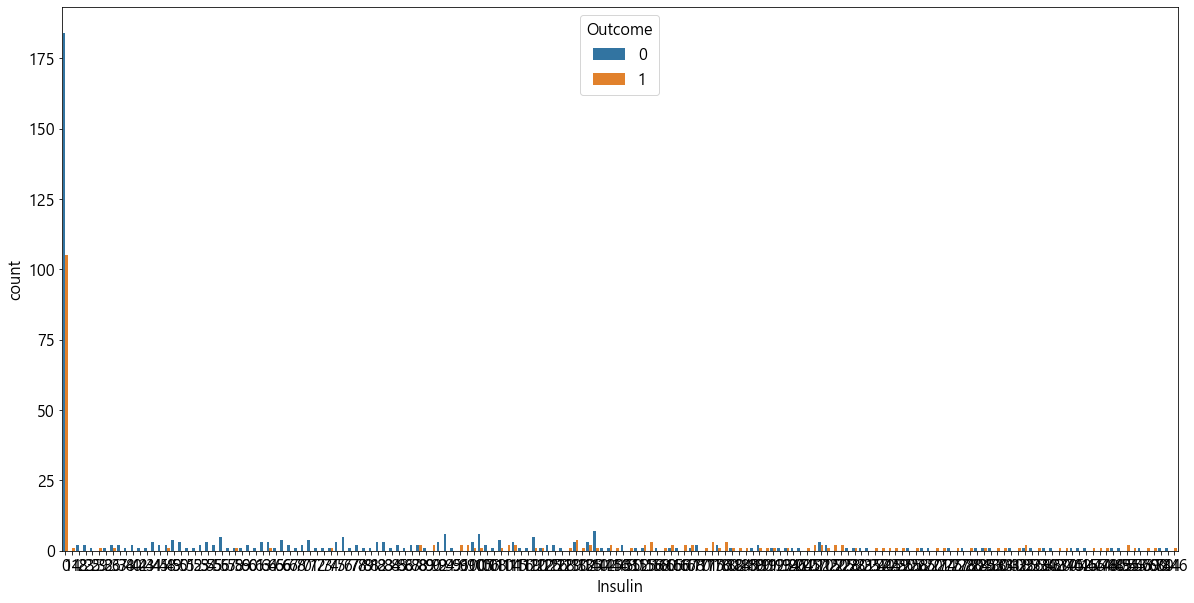

In [10]:
sns.countplot(data=train_df, x="Insulin", hue="Outcome")
plt.show()

인슐린이 수치가 굉장히 다양하고, 높을수록 당뇨병 환자 비율도 올라간다. 또한 0이 결측치를 대체하는것 같다.

### BMI
비만지수

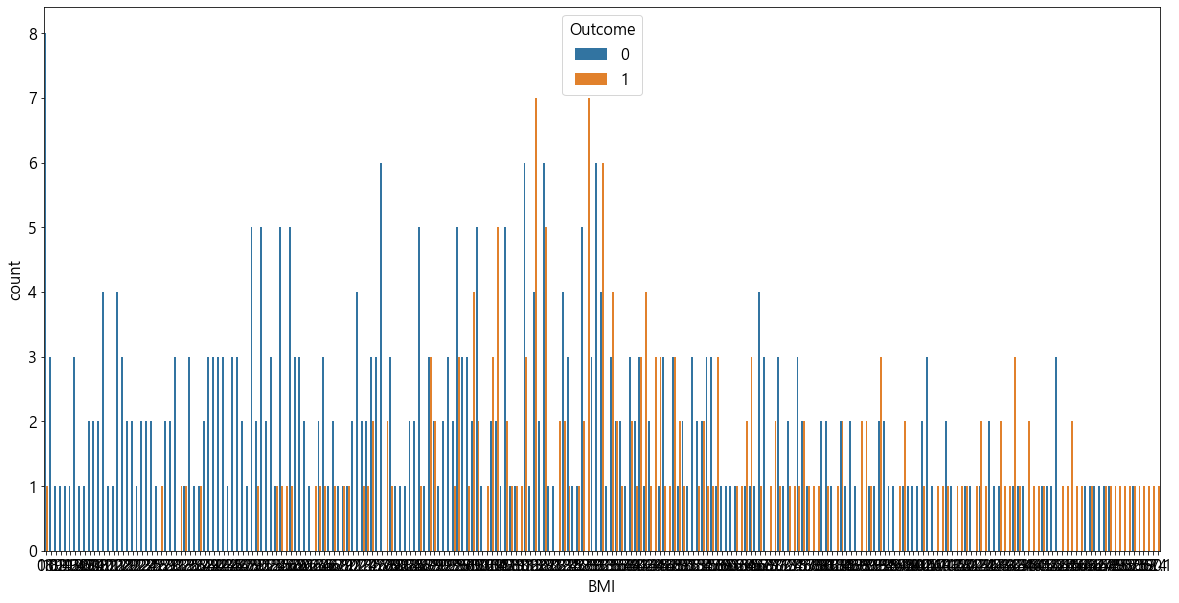

In [11]:
sns.countplot(data=train_df, x="BMI", hue="Outcome")
plt.show()

BMI가 높을수록 당뇨병 환자가 급증한다. BMI가 낮으면 당뇨병이 거의 없다.

### DiabetesPedigreeFunction
- Pedigree 콩팥? 신장? 기능? 몰랑~ 여튼 float값임 ㅎ

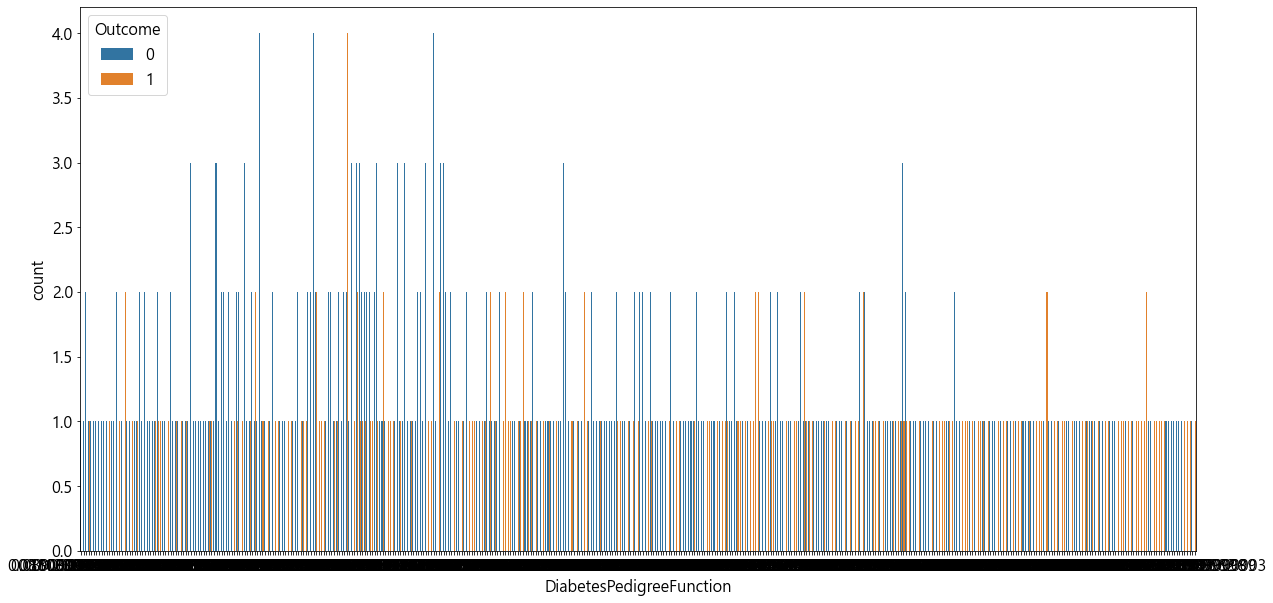

In [12]:
sns.countplot(data=train_df, x="DiabetesPedigreeFunction", hue="Outcome")
plt.show()

### Age
- 나이..는 알제?


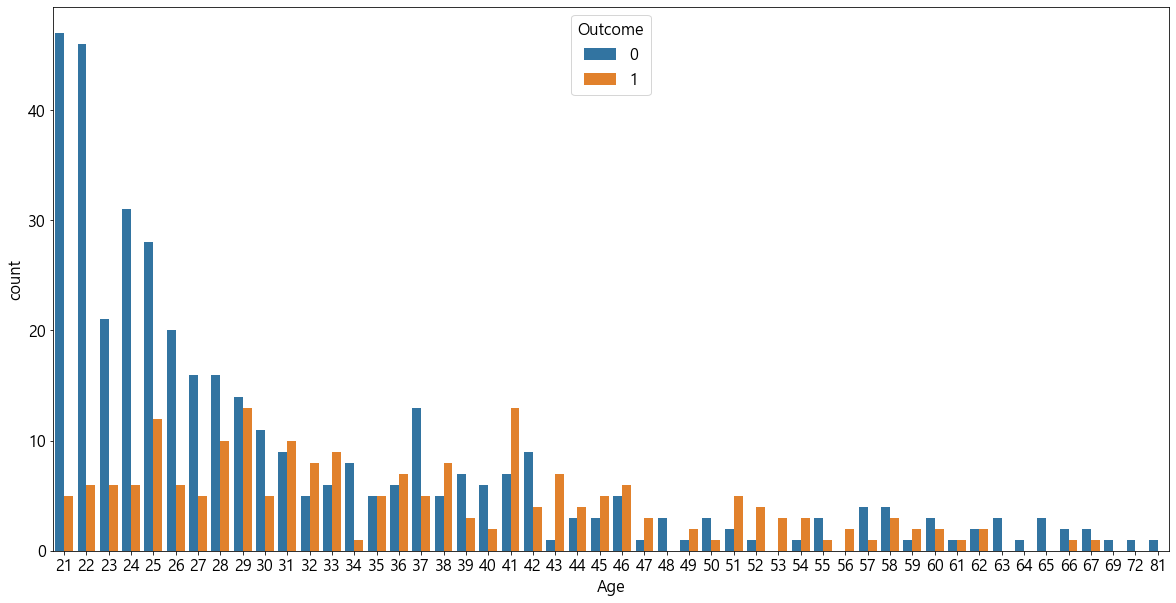

In [13]:
sns.countplot(data=train_df, x="Age", hue="Outcome")
plt.show()

나이가 오를 수록 미세하게 상승한다.

### 머신러닝으로 데이터 전처리

In [14]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               600 non-null    int64  
 1   Glucose                   600 non-null    int64  
 2   BloodPressure             600 non-null    int64  
 3   SkinThickness             600 non-null    int64  
 4   Insulin                   600 non-null    int64  
 5   BMI                       600 non-null    float64
 6   DiabetesPedigreeFunction  600 non-null    float64
 7   Age                       600 non-null    int64  
 8   Outcome                   600 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.3 KB


In [16]:
df1 = train_df.copy()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,0
597,1,89,24,19,25,27.8,0.559,21,0
598,1,173,74,0,0,36.8,0.088,38,1


In [17]:
# 전부다 관련이 있는 것 같다.
# Outcome만 삭제하도록 하자
X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]

display(X)
display(y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22
596,0,67,76,0,0,45.3,0.194,46
597,1,89,24,19,25,27.8,0.559,21
598,1,173,74,0,0,36.8,0.088,38


0      1
1      0
2      1
3      0
4      1
      ..
595    1
596    0
597    0
598    1
599    0
Name: Outcome, Length: 600, dtype: int64

In [18]:
y.isna().sum()

0

In [19]:
# temp = X.copy()
# temp["Outcome"] = y

In [20]:
# # 비율을 확인한다.
# temp.groupby("Pregnancies")["Outcome"].mean()

Pregnancies
0     0.354839
1     0.188119
2     0.210526
3     0.338983
4     0.351852
5     0.408163
6     0.270270
7     0.486486
8     0.593750
9     0.600000
10    0.437500
11    0.571429
12    0.500000
13    0.428571
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [21]:
# # 값을 비율로 변경한다.
# temp["Pregnancies"] = temp.groupby("Pregnancies")["Outcome"].transform("mean")
# temp["Glucose"] = temp.groupby("Glucose")["Outcome"].transform("mean")
# temp["BloodPressure"] = temp.groupby("BloodPressure")["Outcome"].transform("mean")
# temp["SkinThickness"] = temp.groupby("SkinThickness")["Outcome"].transform("mean")
# temp["Insulin"] = temp.groupby("Insulin")["Outcome"].transform("mean")
# temp["BMI"] = temp.groupby("BMI")["Outcome"].transform("mean")
# temp["DiabetesPedigreeFunction"] = temp.groupby("DiabetesPedigreeFunction")["Outcome"].transform("mean")
# temp["Age"] = temp.groupby("Age")["Outcome"].transform("mean")

# temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,0.250000,1
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,0.526316,0
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,0.615385,1
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,0.096154,0
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,0.600000,1
...,...,...,...,...,...,...,...,...,...
595,0.354839,1.000000,0.409091,0.333333,1.000000,0.454545,1.0,0.115385,1
596,0.354839,0.000000,0.482759,0.388571,0.363322,0.000000,0.0,0.545455,0
597,0.188119,0.000000,0.000000,0.142857,0.000000,0.000000,0.0,0.096154,0
598,0.188119,0.800000,0.315789,0.388571,0.363322,0.200000,0.5,0.615385,1


In [22]:
# # 평균
# temp["Mean"] = 0
# # 최대
# temp["Max"] = 0
# # 최소
# temp["Min"] = 0
# # 최대-최소
# temp["Diff"] = 0
# # std
# temp["Std"] = 0


In [23]:
# temp["Mean"] = temp.mean(axis=1)
# temp["Max"] = temp.max(axis=1)
# temp["Min"] = temp.min(axis=1)
# temp["Diff"] = temp["Max"] - temp["Min"]
# temp["Std"] = temp.std(axis=1)
# temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Mean,Max,Min,Diff,Std
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,0.250000,1,0.372840,1.000000,0.0,1.000000,0.364378
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,0.526316,0,0.154115,0.526316,0.0,0.526316,0.202889
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,0.615385,1,0.447023,1.000000,0.0,1.000000,0.381229
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,0.096154,0,0.060004,0.379310,0.0,0.379310,0.155536
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,0.600000,1,0.467399,1.000000,0.0,1.000000,0.375762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.354839,1.000000,0.409091,0.333333,1.000000,0.454545,1.0,0.115385,1,0.404800,1.000000,0.0,1.000000,0.405167
596,0.354839,0.000000,0.482759,0.388571,0.363322,0.000000,0.0,0.545455,0,0.152496,0.545455,0.0,0.545455,0.238995
597,0.188119,0.000000,0.000000,0.142857,0.000000,0.000000,0.0,0.096154,0,0.030509,0.188119,0.0,0.188119,0.081845
598,0.188119,0.800000,0.315789,0.388571,0.363322,0.200000,0.5,0.615385,1,0.312228,1.000000,0.0,1.000000,0.354500


In [24]:
# df1["Mean"] = temp["Mean"]
# df1["Max"] = temp["Max"] 
# df1["Min"] = temp["Min"]
# df1["Diff"] = temp["Diff"] 
# df1["Std"] = temp["Std"] 
# df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Mean,Max,Min,Diff,Std
0,6,148,72,35,0,33.6,0.627,50,1,0.372840,1.000000,0.0,1.000000,0.364378
1,1,85,66,29,0,26.6,0.351,31,0,0.154115,0.526316,0.0,0.526316,0.202889
2,8,183,64,0,0,23.3,0.672,32,1,0.447023,1.000000,0.0,1.000000,0.381229
3,1,89,66,23,94,28.1,0.167,21,0,0.060004,0.379310,0.0,0.379310,0.155536
4,0,137,40,35,168,43.1,2.288,33,1,0.467399,1.000000,0.0,1.000000,0.375762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22,1,0.404800,1.000000,0.0,1.000000,0.405167
596,0,67,76,0,0,45.3,0.194,46,0,0.152496,0.545455,0.0,0.545455,0.238995
597,1,89,24,19,25,27.8,0.559,21,0,0.030509,0.188119,0.0,0.188119,0.081845
598,1,173,74,0,0,36.8,0.088,38,1,0.312228,1.000000,0.0,1.000000,0.354500


In [25]:
# # 데이터를 준비한다.
# # 학습 데이터 개수
# n_train = len(train_df)
# # 예측 데이터 개수
# n_test = len(test_df)

# X_train = df1[:n_train]
# y_train = y

# display(X_train)
# display(y_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Mean,Max,Min,Diff,Std
0,6,148,72,35,0,33.6,0.627,50,1,0.372840,1.000000,0.0,1.000000,0.364378
1,1,85,66,29,0,26.6,0.351,31,0,0.154115,0.526316,0.0,0.526316,0.202889
2,8,183,64,0,0,23.3,0.672,32,1,0.447023,1.000000,0.0,1.000000,0.381229
3,1,89,66,23,94,28.1,0.167,21,0,0.060004,0.379310,0.0,0.379310,0.155536
4,0,137,40,35,168,43.1,2.288,33,1,0.467399,1.000000,0.0,1.000000,0.375762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22,1,0.404800,1.000000,0.0,1.000000,0.405167
596,0,67,76,0,0,45.3,0.194,46,0,0.152496,0.545455,0.0,0.545455,0.238995
597,1,89,24,19,25,27.8,0.559,21,0,0.030509,0.188119,0.0,0.188119,0.081845
598,1,173,74,0,0,36.8,0.088,38,1,0.312228,1.000000,0.0,1.000000,0.354500


0      1
1      0
2      1
3      0
4      1
      ..
595    1
596    0
597    0
598    1
599    0
Name: Outcome, Length: 600, dtype: int64

In [26]:
# # 표준화 작업
# scaler1 = StandardScaler()
# scaler1.fit(X_train)
# X_train = scaler1.transform(X_train)
# X_train

### 기본 모델 사용하기

In [27]:
# 데이터를 다른 변수에 담는다.
model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = (
    ("model1", model1), ("model2", model2), ("model3", model3), 
    ("model4", model4), ("model5", model5), ("model6", model6), 
    ("model7", model7), ("model8", model8), ("model9", model9), 
)

model10 = VotingClassifier(estimators=model_list, voting="hard")
model11 = VotingClassifier(estimators=model_list, voting="soft")

In [28]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    model1, model2, model3, model4, model5, model6,
    model7, model8, model9, model10, model11
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [29]:
# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for ml in check_list:
    score = cross_val_score(ml, X_train, y_train, scoring="f1", cv=kfold)
    score_list.append(score.mean())
    
score_list

[0.5473269041117963,
 1.0,
 0.5579291457891863,
 0.9974358974358974,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [30]:
# 시각화를 위해 데이터 프레임을 생성한다.
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,LogisticRegression,1.000000
1,RandomForest,1.000000
2,AdaBoost,1.000000
3,GradianBoost,1.000000
4,LGBM,1.000000
5,XGBoost,1.000000
6,Voting(Hard),1.000000
7,Voting(Soft),1.000000
8,DecisionTree,0.997436
9,SVC,0.557929


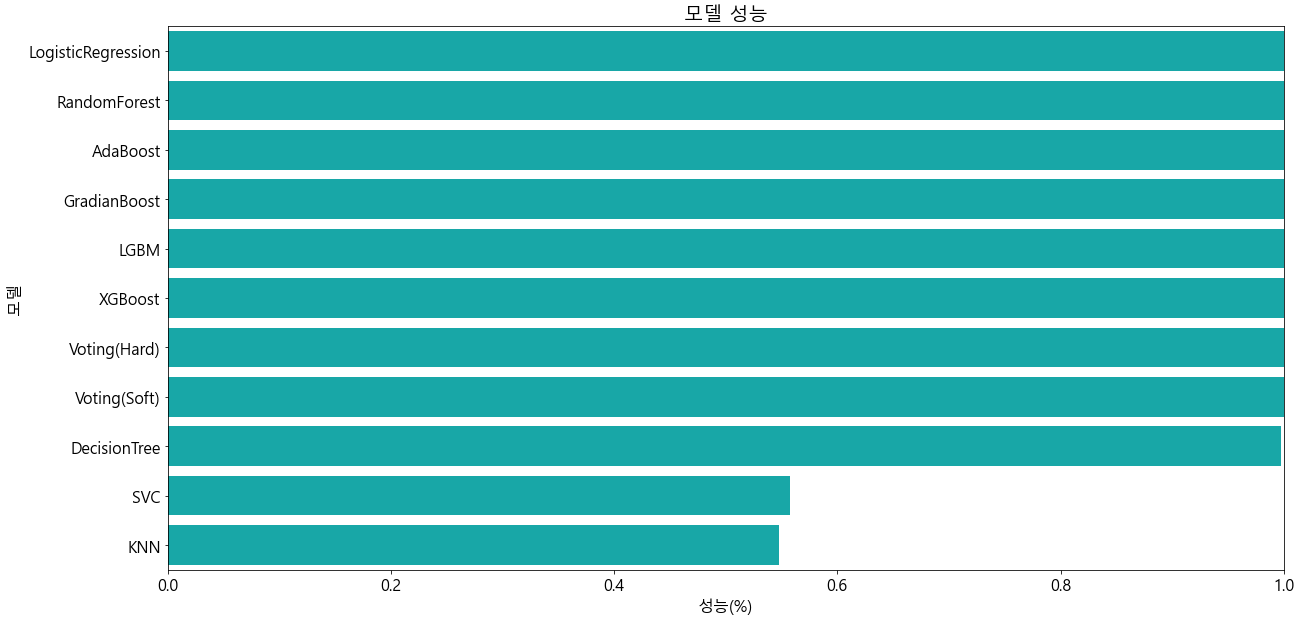

In [31]:
# 성능 평가를 중간결과를 시각화한다.
sns.barplot(data=results_df, x="Score", y="Model", color="c")

plt.title("모델 성능")
plt.xlabel("성능(%)")
plt.ylabel("모델")
plt.xlim(0, 1)

plt.show()

### hyper parameter 튜닝하기

In [32]:
# KNN
params = {
    "n_neighbors": list(range(1, 11))
}

# 사용할 모델 객체를 생성한다.
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다.
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring="f1", cv=kfold)
grid_clf1.fit(X_train, y_train)

# 결과 출력
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")

최적의 하이퍼 파라미터 : {'n_neighbors': 1}
최적의 모델 평균 성능 : 0.5517148825101613


In [33]:
# LogisticRegression
# penalty : 규제의 종류(l1, l2, elasticnet(l1,l2 모두 사용하는것), none)
# C: 규제의 강도 
params = {
    "penalty" : ["l1", "l2", "elasticnet", "none"],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring="f1", cv=kfold)
start = datetime.datetime.now()

grid_clf2.fit(X_train, y_train)

end = datetime.datetime.now()
print(f"최적의 하이퍼 파라미터 : {grid_clf2.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf2.best_score_}")
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:09.589917


In [34]:
# SVM(SVC)
# SVM은 l2로 penalty가 고정되어 있다.
# C: 규제의 강도 
params = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring="f1", cv=kfold)
start = datetime.datetime.now()

grid_clf3.fit(X_train, y_train)

end = datetime.datetime.now()
print(f"최적의 하이퍼 파라미터 : {grid_clf3.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf3.best_score_}")
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'C': 1000}
최적의 모델 평균 성능 : 0.9809300719666876
총 튜닝 시간 : 0:00:05.568788


In [35]:
# DecisonTree
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = DecisionTreeClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='f1', cv=kfold)
start = datetime.datetime.now()

grid_clf4.fit(X_train, y_train)

end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf4.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 0.9974358974358974
총 튜닝 시간 : 0:00:00.960447


In [36]:
# RandomForest
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model5 = RandomForestClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf5.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf5.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:03:09.113197


In [37]:
# AdaBoost
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model6 = AdaBoostClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf6.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf6.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:02.909401


In [38]:
# GradientBoosting
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = GradientBoostingClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf7.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf7.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:53.036438


In [39]:
# Light GBM
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = LGBMClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf8.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf8.best_score_}')
print(f'총 튜닝 시간 : {end - start}')


최적의 하이퍼 파라미터 : {'learning_rate': 0.001, 'n_estimators': 300}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:14.165793


In [40]:
# XGBoost
# booster : 내부에 사용할 알고리즘
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'booster' : ["gbtree", "gblinear"],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model9 = XGBClassifier(random_state=1, silent=True, verbosity=0 )
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf9.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf9.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:50.772567


In [41]:
# voting
# SVC에서 확률을 확인할 수 있도록 설정한다.
grid_clf3.best_estimator_.probability = True

model_list = (
    ("model1", grid_clf1.best_estimator_),
    ("model2", grid_clf2.best_estimator_),
    ("model3", grid_clf3.best_estimator_),
    ("model4", grid_clf4.best_estimator_),
    ("model5", grid_clf5.best_estimator_),
    ("model6", grid_clf6.best_estimator_),
    ("model7", grid_clf7.best_estimator_),
    ("model8", grid_clf8.best_estimator_),
    ("model9", grid_clf9.best_estimator_),
)

model10 = VotingClassifier(estimators=model_list, voting="hard")
model11 = VotingClassifier(estimators=model_list, voting="soft")

In [42]:
# voting 모델 교차 검증
r10 = cross_val_score(model10, X_train, y_train, scoring="f1", cv=kfold)
r11 = cross_val_score(model11, X_train, y_train, scoring="f1", cv=kfold)

In [43]:
# 시각화를 위한 데이터 프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_, 
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_, 
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_, 
    r10.mean(), r11.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Score
0,LogisticRegression,1.000000
1,RandomForest,1.000000
2,AdaBoost,1.000000
3,GradianBoost,1.000000
4,LGBM,1.000000
5,XGBoost,1.000000
6,Voting(Hard),1.000000
7,Voting(Soft),1.000000
8,DecisionTree,0.997436
9,SVC,0.980930


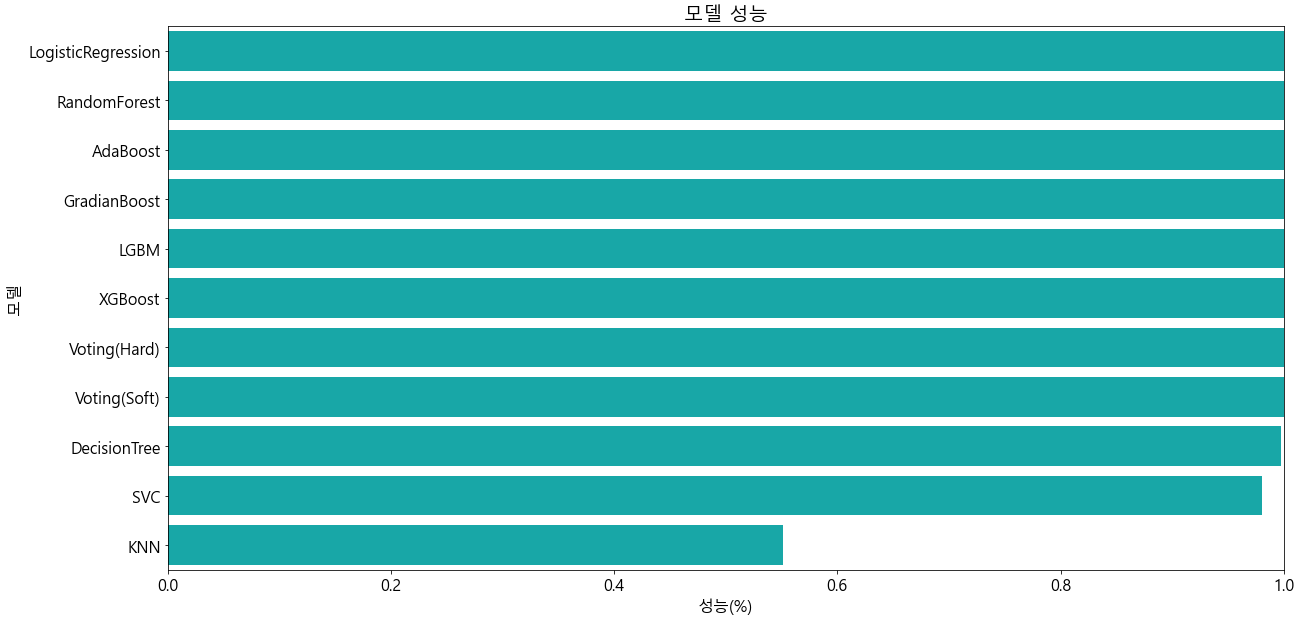

In [44]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x="Score", y="Model", color="c")

plt.title("모델 성능")
plt.xlabel("성능(%)")
plt.ylabel("모델")
plt.xlim(0,1)

plt.show()

### 전체 데이터를 학습과 검증으로 나눠서 최종 평가를 실시한다.

In [45]:
model1 = grid_clf1.best_estimator_
model2 = grid_clf2.best_estimator_
model3 = grid_clf3.best_estimator_
model4 = grid_clf4.best_estimator_
model5 = grid_clf5.best_estimator_
model6 = grid_clf6.best_estimator_
model7 = grid_clf7.best_estimator_
model8 = grid_clf8.best_estimator_
model9 = grid_clf9.best_estimator_


In [46]:
# 학습용과 검증용으로 나눈다.
x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=3, random_state=1)


In [47]:
# 학습용 데이터로 학습을 시킨다.
model1.fit(x1, y1)
model2.fit(x1, y1)
model3.fit(x1, y1)
model4.fit(x1, y1)
model5.fit(x1, y1)
model6.fit(x1, y1)
model7.fit(x1, y1)
model8.fit(x1, y1)
model9.fit(x1, y1)
model10.fit(x1, y1)
model11.fit(x1, y1)

VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=1)),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=1000, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.0001,
                                            max_delta_step=0, max_depth=6,
  

In [48]:
# 검증 데이터를 통해 예측 결과를 가져온다
y_pred1 = model1.predict(x2)
y_pred2 = model2.predict(x2)
y_pred3 = model3.predict(x2)
y_pred4 = model4.predict(x2)
y_pred5 = model5.predict(x2)
y_pred6 = model6.predict(x2)
y_pred7 = model7.predict(x2)
y_pred8 = model8.predict(x2)
y_pred9 = model9.predict(x2)
y_pred10 = model10.predict(x2)
y_pred11 = model11.predict(x2)


In [49]:
# 진짜 결과와 비교해서 평가를 실시한다.
r1 = f1_score(y2, y_pred1)
r2 = f1_score(y2, y_pred2)
r3 = f1_score(y2, y_pred3)
r4 = f1_score(y2, y_pred4)
r5 = f1_score(y2, y_pred5)
r6 = f1_score(y2, y_pred6)
r7 = f1_score(y2, y_pred7)
r8 = f1_score(y2, y_pred8)
r9 = f1_score(y2, y_pred9)
r10 = f1_score(y2, y_pred10)
r11 = f1_score(y2, y_pred11)

In [50]:
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11]
})

# score 기준으로 정렬
results_df.sort_values(by="Score", ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,LogisticRegression,1.0
1,SVC,1.0
2,DecisionTree,1.0
3,RandomForest,1.0
4,AdaBoost,1.0
5,GradianBoost,1.0
6,LGBM,1.0
7,XGBoost,1.0
8,Voting(Hard),1.0
9,Voting(Soft),1.0


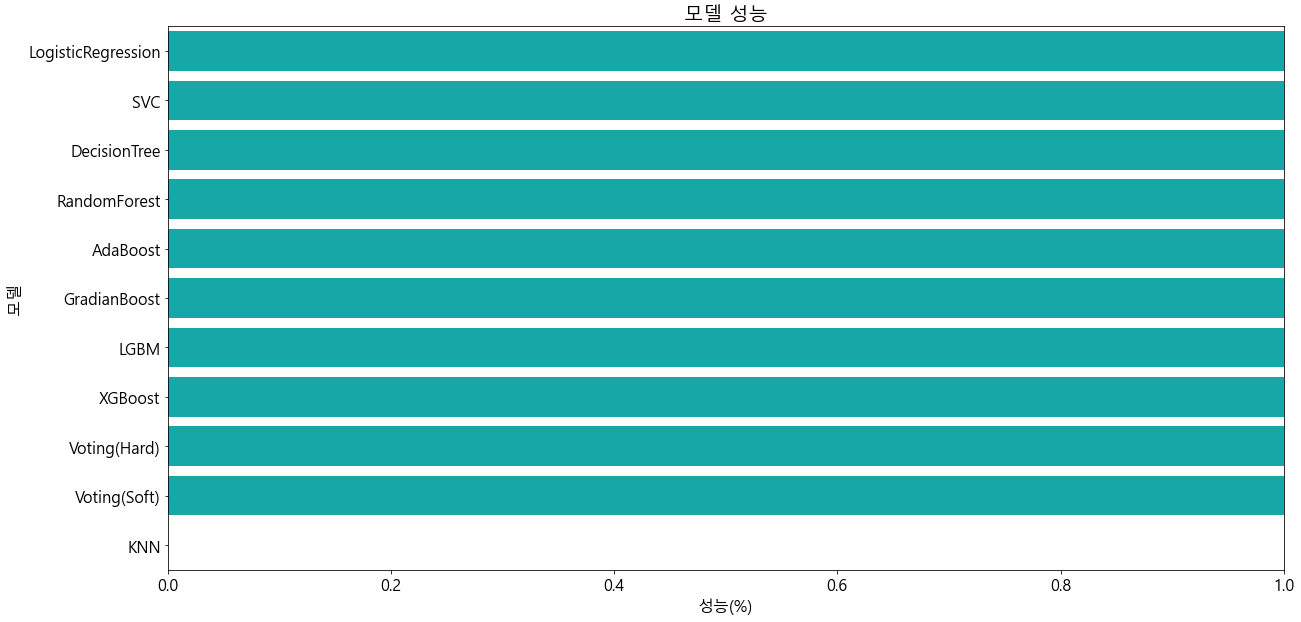

In [51]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()


### 최종 선정된 모델에 모든 데이터를 학습시킨다.
- Voting(Soft)로 하겠습니다.
- 이유는.. 난 soft하기 떄문..?

In [52]:
model11

VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=1)),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=1000, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.0001,
                                            max_delta_step=0, max_depth=6,
  

In [66]:
model11.fit(X_train, y_train)

VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=1)),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=1000, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.0001,
                                            max_delta_step=0, max_depth=6,
  

### 결과를 예측한다.

In [64]:
test_df = pd.read_csv("data/diabetes_test.csv")
test_df = scaler1.transform(test_df)
test_df

array([[-0.83948403, -0.37188541,  0.9986687 , ..., -0.60044449,
        -0.24054196, -0.78547007],
       [ 0.64896283, -0.73963365, -3.55052529, ..., -1.02528729,
        -0.86368204, -0.44684457],
       [-0.83948403,  0.11844558,  0.2749333 , ..., -0.51297685,
        -1.13074208, -0.27753182],
       ...,
       [ 0.35127346,  0.02650852,  0.17154252, ..., -0.71290288,
        -0.70047869, -0.27753182],
       [-0.83948403,  0.17973695, -0.44880211, ..., -0.2255832 ,
        -0.39187598,  1.16162657],
       [-0.83948403, -0.83157071,  0.06815175, ..., -0.18809707,
        -0.49276533, -0.87012645]])

In [65]:
y_pred = model11.predict(test_df)
y_pred

ValueError: query data dimension must match training data dimension

In [55]:
# scaler1 = StandardScaler()
# scaler1.fit(X)
# test_df = scaler1.transform(test_df)
# test_df

array([[-0.83948403, -0.37188541,  0.9986687 , ..., -0.60044449,
        -0.24054196, -0.78547007],
       [ 0.64896283, -0.73963365, -3.55052529, ..., -1.02528729,
        -0.86368204, -0.44684457],
       [-0.83948403,  0.11844558,  0.2749333 , ..., -0.51297685,
        -1.13074208, -0.27753182],
       ...,
       [ 0.35127346,  0.02650852,  0.17154252, ..., -0.71290288,
        -0.70047869, -0.27753182],
       [-0.83948403,  0.17973695, -0.44880211, ..., -0.2255832 ,
        -0.39187598,  1.16162657],
       [-0.83948403, -0.83157071,  0.06815175, ..., -0.18809707,
        -0.49276533, -0.87012645]])